# One link calculation

We can try to calculate some coordinates based on the input angles:

In [1]:
%matplotlib inline
from sympy import cos, sin, atan, pi
from ipywidgets import interact, interactive
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import numpy as np

In [2]:
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

In [6]:
from math import *

class TwoArms:
	def __init__(self,w1,w2,a1,a2,s1=0.1,s2=0.1):
		self.angle1 = a1
		self.angle2 = a2
		self.width1 = w1
		self.width2 = w2
		self.step_a1 = s1
		self.step_a2 = s2
		
	def step(self,r1,r2):
		self.angle1 += r1
		self.angle2 += r2
	
	def line1x(self,):
		return [0,cos(self.angle1)*self.width1]
		
	def line1y(self,):
		return [0,sin(self.angle1)*self.width1]		
		
	def line2x(self,):
		t = self.line1x()[1]
		return [t,t+cos(self.angle2)*self.width2]
		
	def line2y(self,):
		t = self.line1y()[1]
		return [t,t+sin(self.angle2)*self.width2]

	def px(self,):
		return self.line2x()[1]

	def py(self,):
		return self.line2y()[1]
	
	def pathTo(self,goalx,goaly,line=None):
		pathx = []
		pathy = []
		pathx.append(self.px());
		pathy.append(self.py());
		nstep = self.nextStepTowards(goalx,goaly)
		while not (nstep[0] == nstep[1] and nstep[0] == 0): #while the best solution is not to stay still
			self.step(nstep[0],nstep[1])
			nstep = self.nextStepTowards(goal[0],goal[1])
			pathx.append(self.px());
			pathy.append(self.py());
			#print(self.distanceToXY(goal[0],goal[1]) , "\t (a1,a2) -> " , nstep[0] ,", ", nstep[1])
		if line is not None:
			line.set_data(pathx,pathy);	
		return len(pathx)
	
	def populateLines(self,l1,l2):
		l1.set_data(self.line1x(),self.line1y())
		l2.set_data(self.line2x(),self.line2y())
		
	def distanceToXY(self,tx,ty):
		dx = tx - self.px()
		dy = ty - self.py()
		return sqrt(dx*dx+dy*dy);
		
	def distanceWithAngles(self,tx,ty,a1,a2):
		cx = cos(a1)*self.width1 + cos(a2)*self.width2
		cy = sin(a1)*self.width1 + sin(a2)*self.width2
		dx = tx - cx
		dy = ty - cy
		return sqrt(dx*dx+dy*dy)

	def nextStepTowards(self,tx,ty):
		i0 = 0
		i1 = self.step_a1
		i2 = -self.step_a2
		j0 = 0
		j1 = self.step_a2
		j2 = -self.step_a2
		
		options = [
					#[i0,j0],
					[i0,j1],
					[i0,j2],
					[i1,j0],
					[i1,j1],
					[i1,j2],
					[i2,j0],
					[i2,j1],
					[i2,j2],					
					]
					
		best_option = [i0,j0]
		best_distance = self.distanceWithAngles(tx,ty,self.angle1+best_option[0],self.angle2+best_option[1])
		for action in options:
			c_dist = self.distanceWithAngles(tx,ty,self.angle1+action[0],self.angle2+action[1])
			if c_dist < best_distance:
				best_distance = c_dist
				best_option = action
				#print("\t tested distance " , best_distance)
		#print("expected distance " , best_distance)
		return best_option
	
arm = TwoArms(10,5,0,0)
goal = [5,5]
nstep = arm.nextStepTowards(goal[0],goal[1])

while not (nstep[0] == nstep[1] and nstep[0] == 0): #while the best solution is not to stay still
	arm.step(nstep[0],nstep[1])
	nstep = arm.nextStepTowards(goal[0],goal[1])
	#print("arm", arm.distanceWithAngles(goal[0],goal[1],arm.angle1,arm.angle2))
	print(arm.distanceToXY(goal[0],goal[1]) , "\t (a1,a2) -> " , nstep[0] ,", ", nstep[1])

print("---------");
arm = TwoArms(10,5,0,0,0.1,0.1)


l = arm.pathTo(5,5)
print("path has ", l, " steps")

10.943424392371881 	 (a1,a2) ->  0 ,  0.1
10.680349355349245 	 (a1,a2) ->  0 ,  0.1
10.391862880312331 	 (a1,a2) ->  0 ,  0.1
10.078796187279101 	 (a1,a2) ->  0 ,  0.1
9.742066062407321 	 (a1,a2) ->  0 ,  0.1
9.382678566152212 	 (a1,a2) ->  0 ,  0.1
9.00173455520323 	 (a1,a2) ->  0 ,  0.1
8.600437833179317 	 (a1,a2) ->  0 ,  0.1
8.180107146740747 	 (a1,a2) ->  0 ,  0.1
7.742193878547099 	 (a1,a2) ->  0 ,  0.1
7.288308313196356 	 (a1,a2) ->  0 ,  0.1
6.820259043868668 	 (a1,a2) ->  0 ,  0.1
6.340112945395352 	 (a1,a2) ->  0 ,  0.1
5.850288082273302 	 (a1,a2) ->  0 ,  0.1
5.353700659654256 	 (a1,a2) ->  0 ,  0.1
4.854002856700879 	 (a1,a2) ->  0 ,  0.1
4.355976901063677 	 (a1,a2) ->  0 ,  0.1
3.8662014589821707 	 (a1,a2) ->  0 ,  0.1
3.3941887502692145 	 (a1,a2) ->  0 ,  0.1
2.954282794750493 	 (a1,a2) ->  0 ,  0.1
2.568506655152645 	 (a1,a2) ->  0 ,  0.1
2.269388452040152 	 (a1,a2) ->  0 ,  0.1
2.09784134938102 	 (a1,a2) ->  0 ,  0.1
2.0873799834673563 	 (a1,a2) ->  0 ,  0
---------
pat

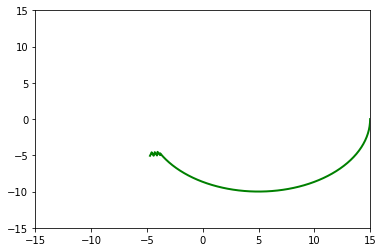

In [7]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( -15, 15))
ax.set_ylim((-15, 15))

line, = ax.plot([], [], lw=2, color="blue")
line2, = ax.plot([], [], lw=2, color="red")
pathline, = ax.plot([], [], lw=2, color="green")

width = 10;
width2 = 5;
step = 0.05;
goal = [-5,-5]

tarm = TwoArms(width,width2,0,0,step,step)
tarm2 = TwoArms(width,width2,0,0,step, step)
path_length = tarm.pathTo(goal[0],goal[1],pathline) #this changes internal variables

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    line2.set_data([], [])
    #pathline.set_data([], [])

    print("End of init")
    return (line,line2,pathline)


def animate(i):
    nstep = tarm2.nextStepTowards(goal[0],goal[1])
    tarm2.step(nstep[0],nstep[1])
    tarm2.populateLines(line,line2)
    #print(nstep[0],nstep[1])

    #pathline.set_data()
    return (line,line2,pathline)

Note, if it fails below
Open an Anaconda shell and type: 
 > conda install -c conda-forge ffmpeg

In [8]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=path_length, interval=50, blit=True)
print(path_length)

anim

End of init
64
End of init
